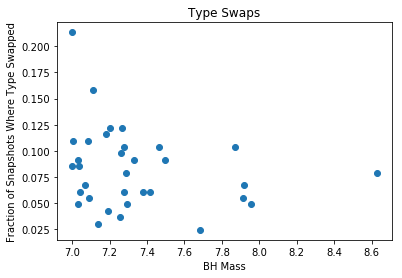

/Applications/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10


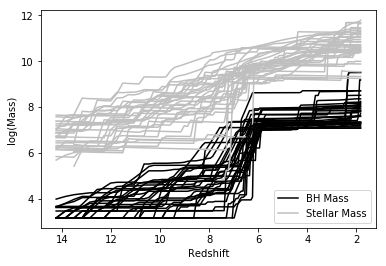

/Applications/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide
/Applications/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in true_divide


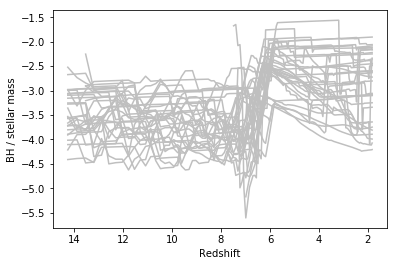

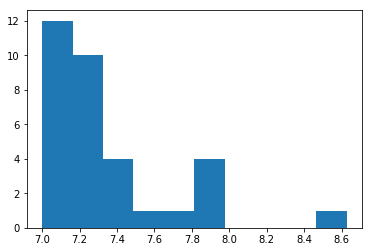

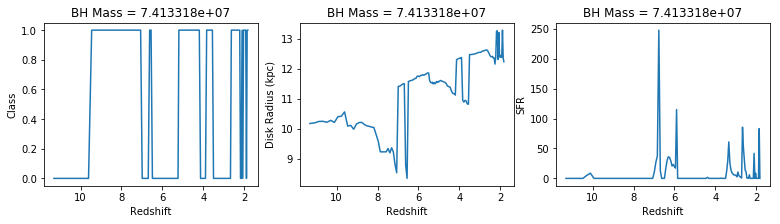

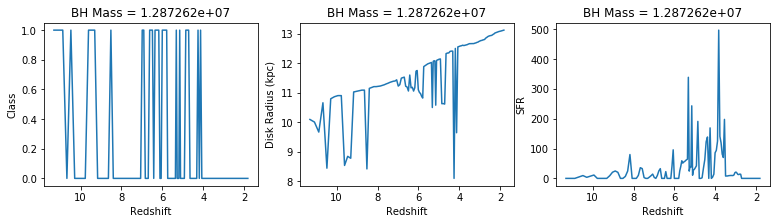

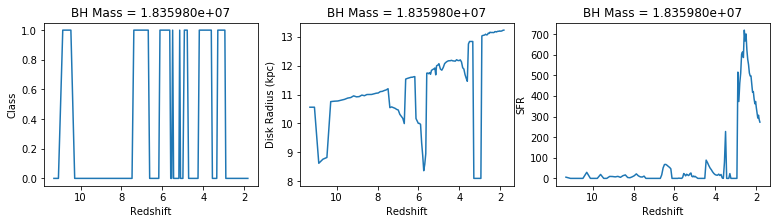

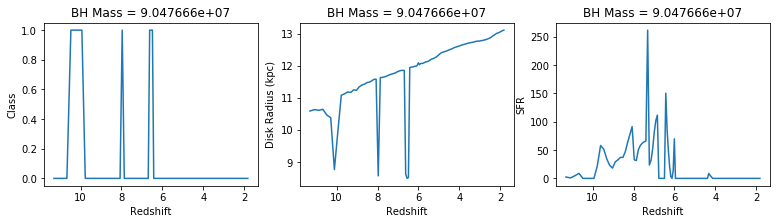

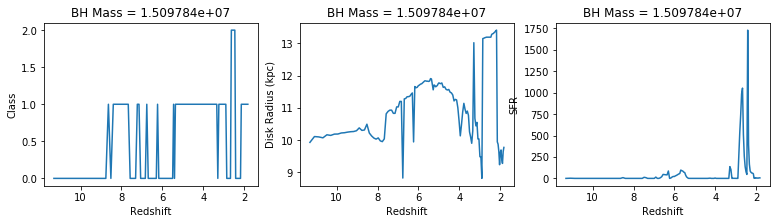

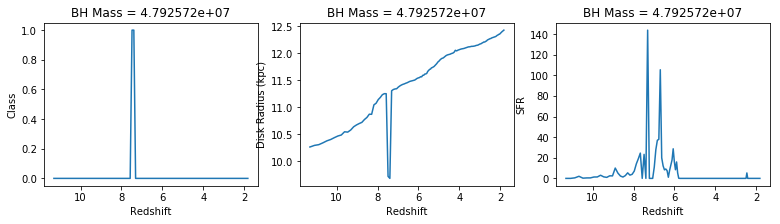

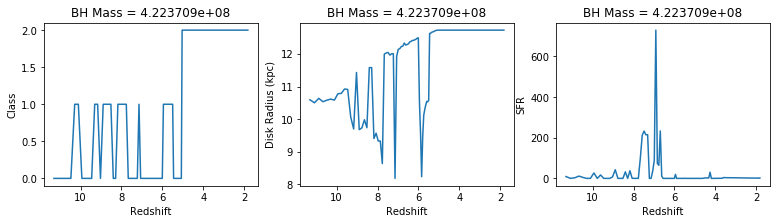

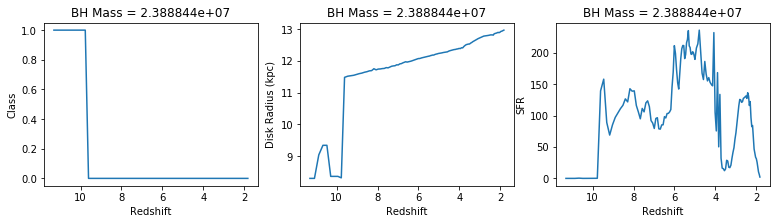

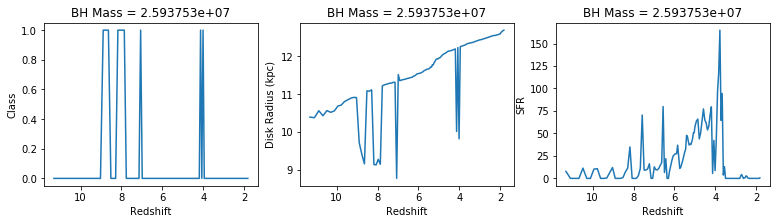

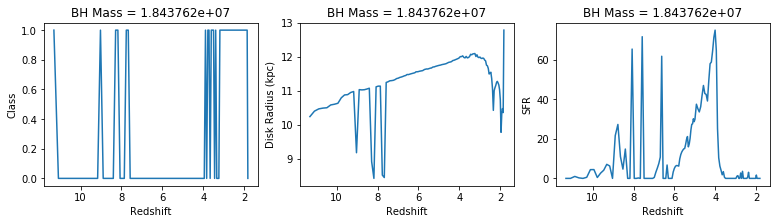

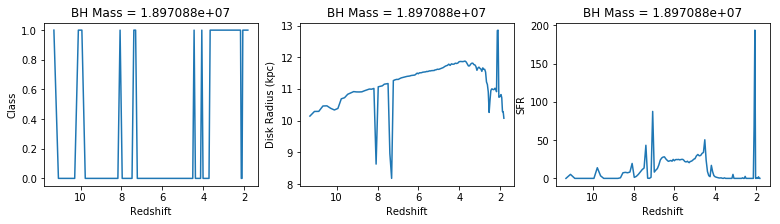

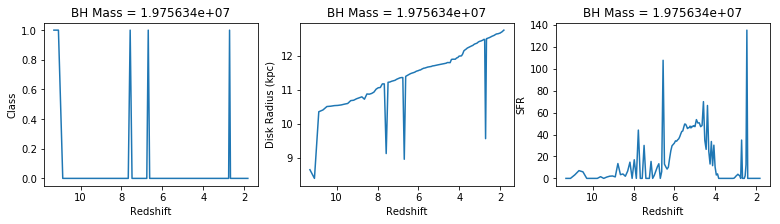

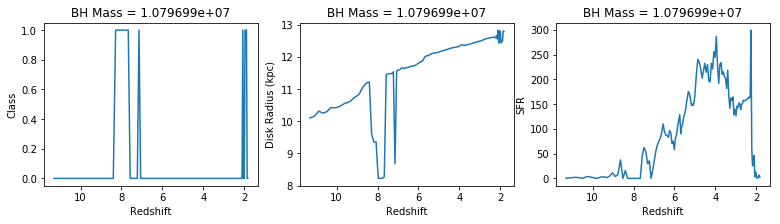

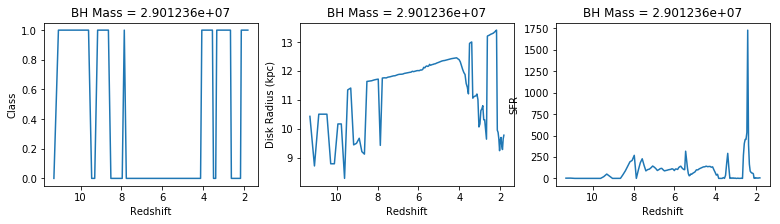

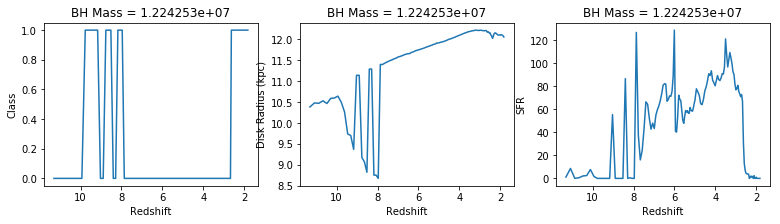

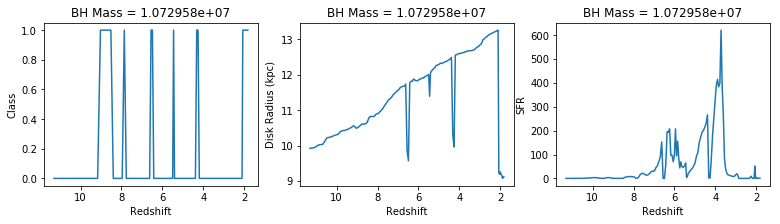

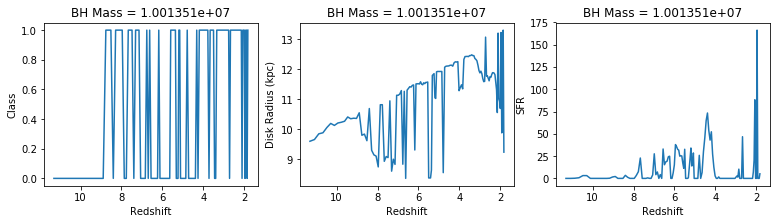

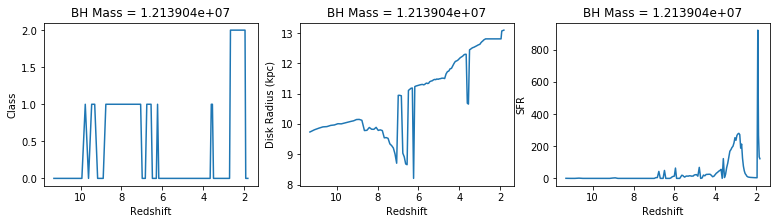

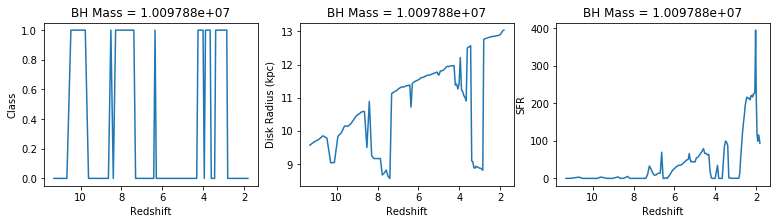

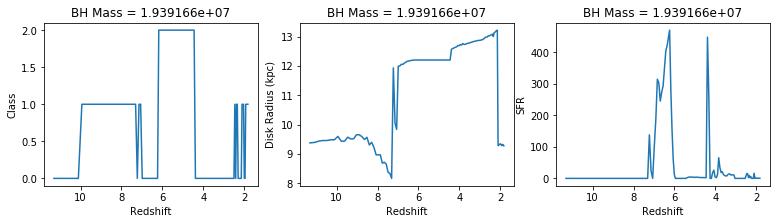

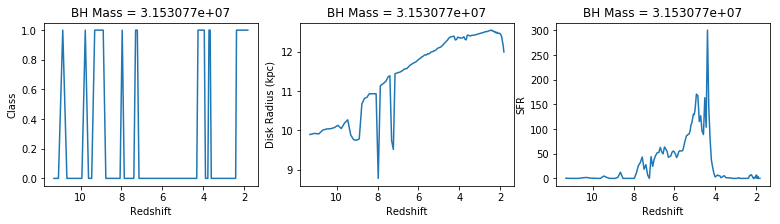

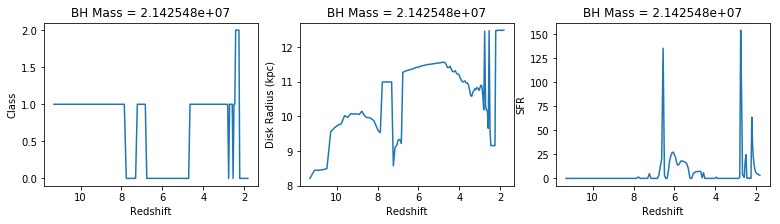

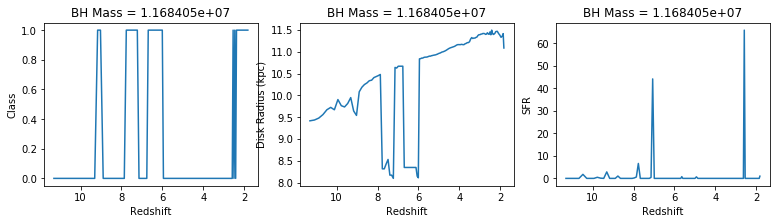

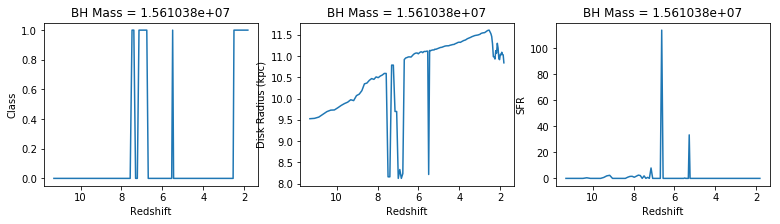

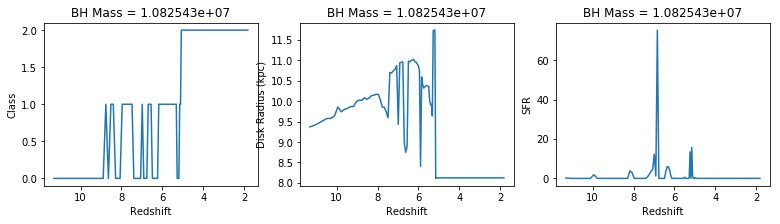

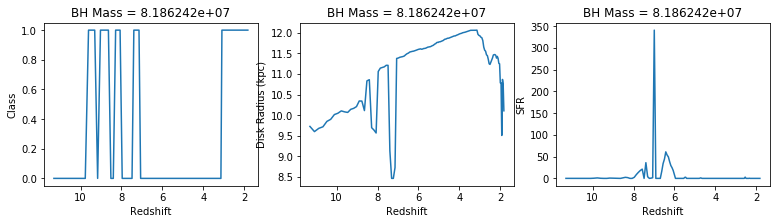

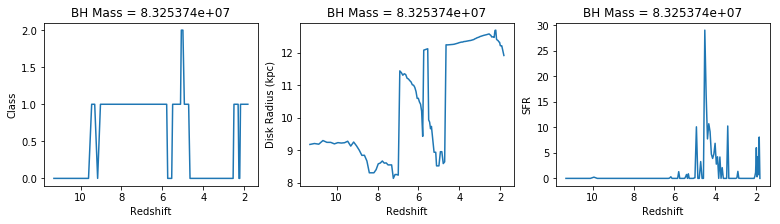

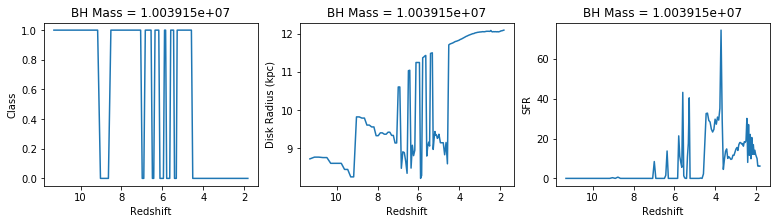

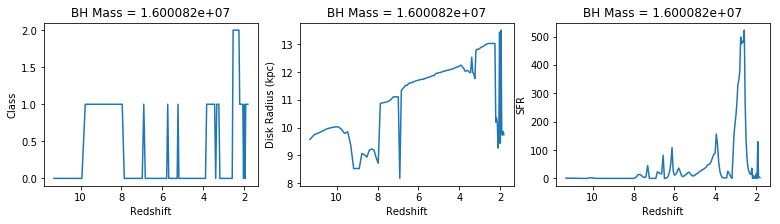

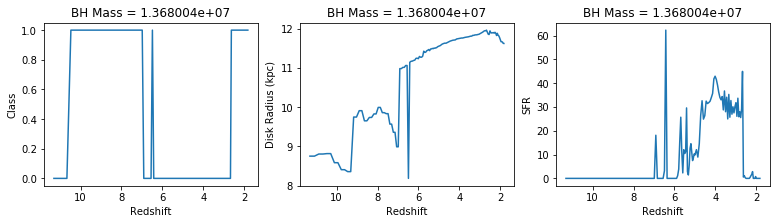

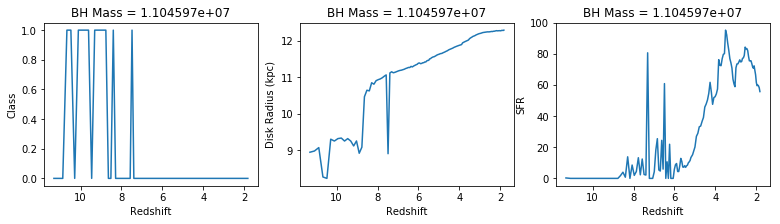

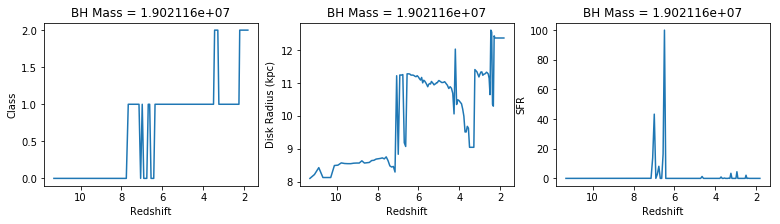

/Applications/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log10


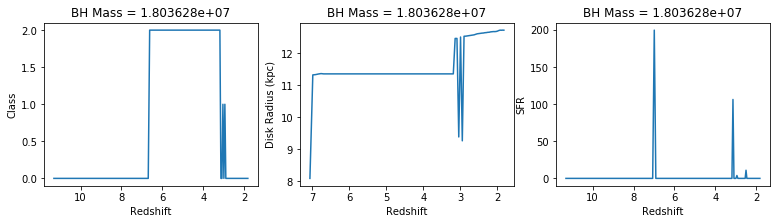

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##Load and store the data for the most massive BHs in the data files

#Load IDs of all galaxy hosts
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/history_gal/ID_z5pt84.dat'
ID=np.fromfile(fname,dtype=float,count=-1,sep="")
#Load redshift info
fname='/Users/Maddie/GoogleDrive/PhD/Simulations/90016870715/a_list.txt'
scalefactor=np.fromfile(fname,dtype=float,count=-1,sep="\n")
redshift=1/scalefactor-1
#Set up data structure to hold galaxy info
BHproperties=np.zeros((16,len(ID),len(redshift)))
addcolumns=['ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir']
columns=['BHmass','ID','Type','CentralGal','ColdGas','HotGas','StellarMass','DiskScaleLength','Sfr','Rvir','Mvir','Vvir','dClass','XPos','YPos','ZPos']

swapCount=np.zeros((len(ID),1))
swapFrac=np.zeros((len(ID),1))
idx=0
#Loop through the galaxies and import their info
for galID in ID:
    #Load data
    fname='/Users/Maddie/GoogleDrive/PhD/Simulations/history_gal/history/'+str(int(galID))+'/BlackHoleMass.bin'
    BHmass=np.fromfile(fname,dtype=float,count=-1,sep="")
    BHproperties[0,idx,:]=BHmass
    i=1
    for name in addcolumns: 
        fname='/Users/Maddie/GoogleDrive/PhD/Simulations/history_gal/history/'+str(int(galID))+'/'+name+'.bin'
        col=np.fromfile(fname,dtype=float,count=-1,sep="")
        BHproperties[i,idx,:]=col
        i=i+1
        #fname='/Users/Maddie/Downloads/90016870715/Pos.bin'
        #col=np.fromfile(fname,dtype=float,count=-1,sep="")
        #print(col)
        #BHproperties[-3,:]=col[1]
        #BHproperties[-2,:]=col[2]
        #BHproperties[-1,:]=col[3]
    #Create array holding changes in type/class
    for t in range(1,len(redshift)):
        BHproperties[-4,idx,t]=BHproperties[2,idx,t]-BHproperties[2,idx,t-1]
    #Count how many times each galaxy changes type/class
    swapCount[idx]= len([i for i in range(0,len(redshift)) if BHproperties[-4,idx,i]!=0])
    swapFrac[idx]=swapCount[idx]/len(redshift)
    idx=idx+1
    
plt.plot(np.log10(BHproperties[0,:,81]*1e10),swapFrac,'o')
plt.ylabel('Fraction of Snapshots Where Type Swapped')
plt.xlabel('BH Mass')
plt.title('Type Swaps')
plt.show()
    
for i in range(0,len(ID)):
    plt.plot(redshift[20:],np.log10(BHproperties[0,i,20:]*1e10),'k')
    plt.plot(redshift[20:],np.log10(BHproperties[6,i,20:]*1e10),color = '0.75')
plt.xlabel('Redshift')
plt.ylabel('log(Mass)')
plt.gca().invert_xaxis()
plt.legend(['BH Mass','Stellar Mass'],loc=4)
plt.show()

for i in range(0,len(ID)):
    plt.plot(redshift[20:],np.log10(BHproperties[0,i,20:]/BHproperties[6,i,20:]),color = '0.75')
plt.xlabel('Redshift')
plt.ylabel('BH / stellar mass')
plt.gca().invert_xaxis()
plt.show()

#for i in range(0,len(ID)):
#    plt.plot(redshift[30:-30],np.log10(BHproperties[0,i,30:-30]/BHproperties[6,i,30:-30]),color = '0.75')
#plt.xlabel('Redshift')
#plt.gca().invert_xaxis()
#plt.ylabel('log(BH Mass/Stellar Mass)')
#plt.show()
plt.hist(np.log10(BHproperties[0,:,81]*1e10))
plt.show()

#f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True,figsize=(8,12))
for i in range(0,len(ID)):
    f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,3))
    ax1.plot(redshift[30:],BHproperties[2,i,30:])
    ax1.set_xlabel('Redshift')
    ax1.invert_xaxis()
    ax1.set_ylabel('Class')
    MBH=BHproperties[0,i,81]*1e10
    ax1.set_title('BH Mass = %e' % MBH)
        

    #ax2.plot(redshift[30:-30],np.log10(BHproperties[-5,i,30:-30]*1e10))
    ##ax2.set_xlabel('Redshift')
    #ax2.invert_xaxis()
    #ax2.set_ylabel('log(Mvir)')

    ax2.plot(redshift[30:],np.log10(BHproperties[-6,i,30:]*1e10)) #7,i,30:]*3000)
    ax2.set_xlabel('Redshift')
    ax2.invert_xaxis()
    ax2.set_ylabel('Disk Radius (kpc)')
    ax2.set_title('BH Mass = %e' % MBH)
     
    ax3.plot(redshift[30:],BHproperties[8,i,30:])
    ax3.set_xlabel('Redshift')
    ax3.invert_xaxis()
    ax3.set_ylabel('SFR')
    ax3.set_title('BH Mass = %e' % MBH)
    #ax3.set_xlim(ax4.get_xlim()[::-1])

    #ax5.plot(redshift[30:-30],np.log10(BHproperties[4,i,30:-30]*1e10))
    ##ax5.set_xlabel('Redshift')
    #ax5.invert_xaxis()
    #ax5.set_ylabel('log(Cold Gas Mass)')
    #ax5.set_xlim(ax4.get_xlim()[::-1])

    #ax6.plot(redshift[30:-30],BHproperties[-2,30:-30])
    #ax6.set_xlabel('Redshift')
    #ax6.invert_xaxis()
    #ax6.set_ylabel('Z position')
    #ax6.set_xlim(ax4.get_xlim()[::-1])

#f.subplots_adjust(hspace=0.05)
    #plt.savefig('massiveBH.png')
    plt.show()
#fig, ax1 = plt.subplots()
#ax1.plot(redshift[25:-20],BHproperties[8,25:-20])
#ax1.invert_xaxis()
#ax1.set_xlabel('Redshift')
#ax1.set_ylabel('SFR')

#ax2 = ax1.twinx()
#ax2.plot(redshift[25:-20],BHproperties[7,25:-20]*3000,'k--')
#ax2.set_ylabel('Disk Radius (kpc)')

#ax3=ax1.twinx()
#ax3.spines['right'].set_position(('axes', 1.15))
#ax3.plot(redshift[25:-20],BHproperties[2,25:-20],'k')
#ax3.set_ylabel('Class') 
#plt.show()
